In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import make_circles
import plotly.express as px
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [2]:
def load(URL_):
    data = pd.read_csv(URL_, header = None)
    data.columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'outcome']
    print("Data loaded...")
    return data
data = load('https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data')
data.head()

Data loaded...


,buying,maint,doors,persons,lug_boot,safety,outcome
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [3]:
enc = LabelEncoder()
data.loc[:, ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'outcome']] = data.loc[:, ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'outcome']].apply(enc.fit_transform)
data.head()

,buying,maint,doors,persons,lug_boot,safety,outcome
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2


In [4]:
data.outcome.value_counts()

2    1210
0     384
1      69
3      65
Name: outcome, dtype: int64

In [5]:
data = data.loc[((data.loc[:,"outcome"] == 0) | (data.loc[:,"outcome"] == 2)), :]
data

,buying,maint,doors,persons,lug_boot,safety,outcome
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2
...,...,...,...,...,...,...,...
1716,1,1,3,1,0,1,2
1719,1,1,3,2,2,1,2
1720,1,1,3,2,2,2,0
1722,1,1,3,2,1,1,2


In [6]:
data.outcome.value_counts()

2    1210
0     384
Name: outcome, dtype: int64

In [7]:
X = data.drop(['outcome'],axis=1)
y = data['outcome']
y=y.astype('int')
X.head()

,buying,maint,doors,persons,lug_boot,safety
0,3,3,0,0,2,1
1,3,3,0,0,2,2
2,3,3,0,0,2,0
3,3,3,0,0,1,1
4,3,3,0,0,1,2


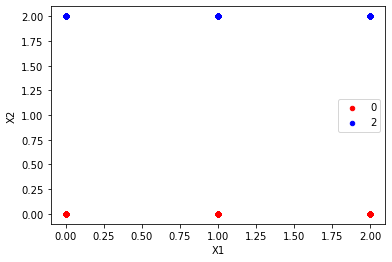

In [8]:
df = pd.DataFrame(dict(X1=X.iloc[:,4], X2=data.iloc[:,6], Y=y))

colors = {0:'red', 2:'blue'}
fig, ax = plt.subplots()

grouped = df.groupby('Y')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='X1', y='X2', label=key, color=colors[key])
plt.show()

In [9]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [10]:
linear=SVC(kernel='linear')
linear.fit(X_train,y_train)

SVC(kernel='linear')

In [11]:
pred=linear.predict(X_test)
accuracy_score(y_test,pred)

0.7390396659707724